# Supervised Learning στο dataset philippine (OML25) του αποθετηρίου OpenML 
## 1.Επισκόπηση του dataset

*   Το συγκεκριμένο dataset έχει την ονομασία philippine και αποτελεί μέρος ενός διαγωνισμού. Τα δεδομένα παρέχονται ως προεπεξεργασμένος πίνακας ώστε οι συμμετέχοντες να μπορούν να επικεντρωθούν στην ταξινόμηση και αφορούν πρόβλημα δυαδικής ταξινόμησης. Είναι σημαντικό να αναφέρουμε πως η ταυτότητα των συνόλων δεδομένων και ο τύπος των δεδομένων αποκρύπτονται, ενώ αποκαλύπτεται μόνο η δομή τους. Πρακτικά σε ένα dataset μας ενδιαφέρει η δομή των δεδομένων και όχι τα ονόματα των labels και features, τα οποία χρησιμεύουν μόνο στην κατανόηση της φύσης του προβλήματος. 
*Για την εισαγωγή του συγκεκριμένου dataset δεν χρειάστηκε μετατροπή σε αρχεία plain text.
*Το πλήθος των δειγμάτων/παρατηρήσεων είναι 5832 και το πλήθως των χαρακτηριστικών είναι 308 (V1 έως V308). Όλα τα χαρακτηριστικά είναι type numeric, είτε float είτε int και είναι μη διατεταγμενα. 
*Στο dataset υπάρχουν επικεφαλίδες (id, class, V1 έως V308) και αρίθμηση γραμμών που στην ουσία είναι η στήλη id.
*Η δεύτερη στήλη αφορά την κλάση στην οποία ανήκουν τα δείγματα, η οποία παίρνει τιμές '0' ή '1', εφόσον είπαμε πως πρόκειται για πρόβλημα δυαδικής ταξινόμησης. Στην ουσία εμείς θα αγνοήσουμε την στήλη με τα id, οπότε θα έχουμε στην πρώτη στήλη την κλάση και στις υπόλοιπες στήλες τα χαρακτηριστικά V1 έως V308.
*Στο dataset δεν υπάρχουν καθόλου απουσιάζουσες τιμές, κάτι το οποίο δίνεται και στην περιγραφή του.
*Το dataset είναι πλήρως ισορροπημένο καθώς 2916 δείγματα αφορούν την κλάση '0' και 2916 δείγματα αφορούν την κλάση '1'.

Ο κώδικας που χρησιμοποιήθηκε για την απόκτηση αυτών των πληροφοριών παρουσιάζεται παρακάτω:

In [ ]:
!pip install -U openml
!pip install -U pip numpy pandas jupyter

In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package

In [ ]:
import openml as oml
oml.config.apikey = '0f8c69cf7665362006365d1a8e8bb21b'

oml.config.server = 'https://www.openml.org/api/v1/xml' 
oml.config.apikey = 'c0c42819af31e706efe1f4b88c23c6c1'
import warnings
warnings.simplefilter(action="ignore", category=DeprecationWarning)

dataset = oml.datasets.get_dataset(41145)

print(
    f"This is dataset '{dataset.name}', the target feature is "
    f"'{dataset.default_target_attribute}'"
)
print(f"URL: {dataset.url}")
print(dataset.description[:500])

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


This is dataset 'philippine', the target feature is 'class'
URL: https://api.openml.org/data/v1/download/19335518/philippine.arff
The goal of this challenge is to expose the research community to real world datasets of interest to 4Paradigm. All datasets are formatted in a uniform way, though the type of data might differ. The data are provided as preprocessed matrices, so that participants can focus on classification, although participants are welcome to use additional feature extraction procedures (as long as they do not violate any rule of the challenge). All problems are binary classification problems and are assessed 


In [ ]:
#Η περιγραφή του dataset
dataset.description

'The goal of this challenge is to expose the research community to real world datasets of interest to 4Paradigm. All datasets are formatted in a uniform way, though the type of data might differ. The data are provided as preprocessed matrices, so that participants can focus on classification, although participants are welcome to use additional feature extraction procedures (as long as they do not violate any rule of the challenge). All problems are binary classification problems and are assessed with the normalized Area Under the ROC Curve (AUC) metric (i.e. 2*AUC-1).\n                   The identity of the datasets and the type of data is concealed, though its structure is revealed. The final score in  phase 2 will be the average of rankings  on all testing datasets, a ranking will be generated from such results, and winners will be determined according to such ranking.\n                   The tasks are constrained by a time budget. The Codalab platform provides computational resource

In [ ]:
#Όλες οι πληροφορίες σχετικά με το dataset
vars(dataset)

In [2]:
#απαραίτητες βιβλιοθήκες που θα χρειαστούν στην συνέχεια 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Κατέβασα το dataset, το μετέτρεψα από αρχείο .arff σε .csv και το εισήγαγα ως dataframe 
filename = "philippine.csv"  
df = pd.read_csv(filename)
df.head()
df

,id,'class','V1','V2','V3','V4','V5','V6','V7','V8',...,'V299','V300','V301','V302','V303','V304','V305','V306','V307','V308'
0,1,0,1.436760,0.000353,1972.84,0.007600,-0.015531,0.780376,103461,0.024912,...,36.5197,0.865036,0.359862,0.003133,2.76052,750.110,-0.008810,0.009179,42.6805,252
1,2,1,2.706900,0.000678,3955.21,-0.009876,-0.003330,0.733401,150978,0.028482,...,64.3038,0.703948,0.610000,-0.006252,4.18539,1200.690,0.049434,-0.005465,41.6983,251
2,3,1,0.464720,0.000715,1453.81,0.002587,-0.005504,0.771300,88342,0.031772,...,24.0798,0.806948,0.112245,-0.010088,1.31197,3876.000,0.006898,0.022098,55.1792,113
3,4,0,3.069800,0.000357,2036.55,0.005065,0.009438,0.873578,123739,0.009533,...,44.5886,0.874592,0.348765,0.007156,2.19352,1013.800,0.010855,-0.002765,39.9233,242
4,5,1,1.650000,0.000545,2325.00,0.006807,-0.003393,0.803415,103812,0.014284,...,30.0132,0.742672,0.284024,-0.003029,2.93776,1336.370,0.015256,-0.010514,39.5254,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,5828,0,0.856631,0.000466,1477.48,-0.006108,-0.003864,0.747118,133267,0.059328,...,43.7463,0.974949,0.160000,-0.003587,1.84779,2990.200,-0.014140,-0.001799,41.8314,174
5828,5829,1,1.889490,0.000488,1282.96,-0.004720,-0.005328,0.733857,90430,0.028634,...,50.7084,0.757757,0.109375,0.004321,1.23832,3200.130,-0.003708,-0.009475,44.5520,119
5829,5830,0,1.891250,0.000558,2906.27,-0.000891,0.001365,0.972040,106998,0.013663,...,36.0546,0.961370,0.396450,0.010167,2.76013,1346.610,-0.016019,-0.001954,42.4695,224
5830,5831,1,1.967740,0.000716,1526.09,0.019319,0.004480,0.964053,50971,0.017742,...,51.9542,0.781702,1.710060,0.000538,1.60956,1753.670,-0.007045,-0.001572,29.8281,131


In [ ]:
#Μερικές πληροφορίες για το dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Columns: 310 entries, id to 'V308'
dtypes: float64(273), int64(37)
memory usage: 13.8 MB


In [ ]:
# βρίσκουμε τις μοναδικές ετικέτες
class_mapping = {label:idx for idx,label in enumerate(np.unique(df["'class'"]))}
print(class_mapping)
# και κάνουμε την μετατροπή
df["'class'"] = df["'class'"].map(class_mapping)  

{0: 0, 1: 1}


In [ ]:
#Όργάνωση των δεδομένων / Παρατήρηση: Δεν έχουμε τα ονόματα των labels 
labels = df["'class'"]
feature_names = df.columns[2::]
features = df.iloc[:,2:]

#Αριθμός των labels, feature_names και features
print(labels.shape)
print(feature_names.shape)
print(features.shape)

#class distribution: 2916 ανήκουν στην '0' και 2916 στην '1'
print("frequencies:", np.bincount(labels))

(5832,)
(308,)
(5832, 308)
frequencies: [2916 2916]


In [ ]:
#χρησιμοποιούμε την βιβλιοθήκη numpy για πιο γρήγορα
np_features = features.values
print(np_features.shape)
print(np.array_equal(features, np_features)) #για σιγουριά ελέγχουμε αν είναι ίδιοι οι πίνακες
np_labels = labels.values.flatten()
print(np_labels)
print(np_labels.shape)
print(np.array_equal(labels, np_labels)) #για σιγουριά ελέγχουμε αν είναι ίδιοι οι πίνακες

(5832, 308)
True
[0 1 1 ... 0 1 0]
(5832,)
True


#2.Προετοιμασία 

*   Διαχωρίζω το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο ελέγχου(test set) με 30% των δειγμάτων στο test set. Το train set περιέχει 4082 δείγματα και το test set περίεχει 1750 (Συνολικά 5832).
*   Δεν υπάρχουν απουσιάζουσες τιμές.
*   Δεν υπάρχουν κατηγορικά χαρακτηριστικά και επιπλέον υποθέτω πως όλα τα χαρακτηριστικά V1 έως V308, τα οποία είναι μη διατεταγμένα, παίζουν σημαντικό ρόλο στο να αποφασιστεί σε ποια κλάση ανήκει το δείγμα.

In [ ]:
#Διαχωρισμός των δεδομένων σε train και test set με random state για να έχουμε κάθε φορά τον ίδιο διαχωρισμό
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(np_features, np_labels, test_size=0.30, random_state=30)

#3.Ταξινομητές και επίδοση out of the box

* Θα εξτάσουμε τους ταξινομητές Dummy,Gaussian Naive Bayes (GNB), KNeirestNeighbors (kNN), Logistic Regression (LR), Multi-Layer Perceptron (MLP), και Support Vector Machines (SVM)
* Αρχικά θα χρησιμοποιήσουμε τις default τιμές για κάθε ταξινομητή 
* Μετρικές απόδοσης είναι η ορθότητα (accuracy) και f1 score

In [ ]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import f1_score #f1score
from sklearn.metrics import accuracy_score #accuracy
from sklearn.metrics import classification_report #classification report

In [ ]:
#classifiers
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [ ]:
classifier_classes = [
    DummyClassifier,
    GaussianNB,
    KNeighborsClassifier,
    LogisticRegression,
    MLPClassifier,
    SVC
]
@ignore_warnings(category=ConvergenceWarning) #κάποιοι ταξινομητές στις default τιμές βγάζουν warnings
def get_default_measurements(classifier_class, train, test, train_labels, test_labels):
    classifier = classifier_class()
    classifier.fit(train, train_labels)
    predictions = classifier.predict(test)
    accuracy = accuracy_score(test_labels, predictions)
    f1score = f1_score(test_labels, predictions)
    return classifier, accuracy, f1score

In [ ]:
default_measurements = [get_default_measurements(classifier_class, train, test, train_labels, test_labels) for classifier_class in classifier_classes]
default_measurements

[(DummyClassifier(), 0.4937142857142857, 0.0),
 (GaussianNB(), 0.6845714285714286, 0.6373193166885677),
 (KNeighborsClassifier(), 0.6291428571428571, 0.6180105944673336),
 (LogisticRegression(), 0.7074285714285714, 0.7016317016317016),
 (MLPClassifier(), 0.5668571428571428, 0.6746781115879829),
 (SVC(), 0.7034285714285714, 0.6821800367421922)]

Ο πίνακας markdown με την out of the box επίδοση φαίνεται παρακάτω:


|  Classifier | Accuracy    | F1 score      |
| :----:       |    :----:   |   :---: |
| *Logistic Regression* |0.7074|0.7016|
| *SVM*|0.7034|0.6822|
| *Gaussian NB* |0.6846|0.6373|
| *K Neighbors*|0.6291|0.6180|
| *MLP* |0.5668|0.6747|
| *Dummy* |0.4937|0.0|

To barplot σύγκρισης των ταξινομητών δημιουργείται παρακάτω:

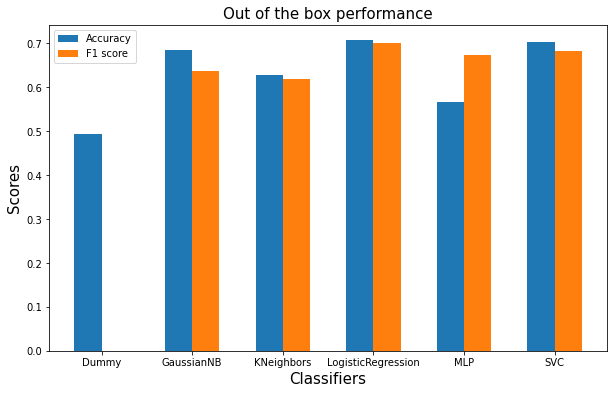

In [4]:
fig = plt.figure(figsize =(10, 6))

Accuracy = [0.4937, 0.6846, 0.6291, 0.7074, 0.5668, 0.7034 ]
F1_score = [0.0, 0.6373, 0.6180, 0.7016, 0.6747, 0.6822]

width =0.3
plt.title('Out of the box performance', fontsize = 15)
plt.bar(np.arange(len(Accuracy)),Accuracy, width=width, label='Accuracy')
plt.bar(np.arange(len(F1_score))+ width, F1_score, width=width, label='F1 score')

plt.xlabel('Classifiers', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.xticks([ r +0.5*width for r in range(len(Accuracy))],['Dummy', 'GaussianNB', 'KNeighbors', 'LogisticRegression', 'MLP', 'SVC'])

plt.legend()
plt.show()

Ο χειρότερος ταξινομητής σε επίδοση είναι ο Dummy
*   Περιμέναμε να βγαίνει accuracy κοντά στο 50% καθώς κάθε φορά προβλέπει μία κλάση. Παρόλο που έχουμε ένα τέλεια ισσοροπημένο dataset δεν βγαίνει ακριβώς 50% καθώς τα test labels κατανεμήθηκαν με αυτό τον τρόπο:

In [ ]:
sum1 = 0
sum2 = 0 

for i in test_labels :
    if i == 0:
       sum1 = sum1 + 1
    else: 
       sum2 = sum2 + 1

print('Test labels that belong to class 0:',sum1)
print('Test labels that belong to class 1:',sum2)

Test labels that belong to class 0: 864
Test labels that belong to class 1: 886


Οι υπόλοιποι ταξινομητές έχουν πολύ κοντινή επίδοση με τον MLP να έχει πιο χαμηλή επίδοση από τους υπόλοιπους στο accuracy, ενώ την καλύτερη επίδοση την έχει οριακά η λογιστική παλινδρόμηση με accuracy και f1 score λίγο περισσότερο από 70%. Ωστόσο, στην λογιστική παλινδρόμηση εμφανίζεται warning καθώς τα δεδομένα δεν είναι κανονικοποιημένα.

#4. Βελτιστοποίηση ταξινομητών 

Επειδή θα χρησιμοποιήσουμε grid search για να βελτιστοποιήσουμε τις υπερπαραμέτρους πρώτα θα δούμε πως διάφορες τεχνικές μείωσης διαστατικότητας επηρεάζουν τα δεδομένα μας. Το dataset έχει 308 features τα οποία θεωρούνται πολλά.

Πρώτα θα εξετάσουμε το variance των χαρακτηριστικών το οποίο φαίνεται παρακάτω. Παρατηρούμε πως με threshold 0.01 τα features μειώνονται από 308 σε 240, με threshold 0.5 σε 200 και με threshold 1 σε 183. Γενικά όσο αυξάνεται το threshold παρατηρούμε πως τα features δεν μειώνονται πολύ. Αξίζει να σημειωθεί πως για να μείνουν μόλις 16 features το threshold πρέπει να γίνει 248.921.150.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
test_reduced = selector.transform(test)
print(train_reduced.shape)
print(test_reduced.shape)

print(train.var(axis=1).min())
print(train.var(axis=1).max())

(4082, 240)
(1750, 240)
248921150.33567938
148786812262.44888


Στην συνέχεια θα δοκιμάσουμε να κάνουμε PCA στα δεδομένα μας. Με λίγες δοκιμές παρατηρούμε πως με n = 13 features το σωρευτικό ποσοστό διασποράς εξηγείται από τις κύριες συνιστώσες σε βαθμό σχεδόν 100%. Πολύ καλές τιμές του n είναι 9 έως 13.

In [ ]:
from sklearn.decomposition import PCA

n = 13
pca = PCA(n_components=n)

trainPCA = pca.fit_transform(train)
testPCA = pca.transform(test)

[0.28208538 0.43071412 0.52455062 0.58739076 0.64912187 0.70908929
 0.7663544  0.82193029 0.87668724 0.92849289 0.97828619 0.99936708
 0.9997032 ]


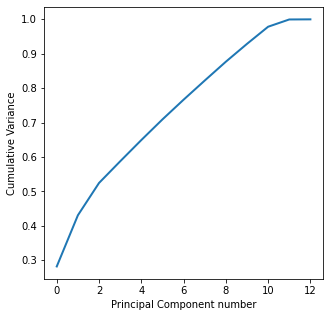

In [ ]:
evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

Όσον αφορά το pipeline που θα δημιουργήσουμε ύστερα απο δοκιμές βρέθηκε πως ο StandradScaler οδηγεί σε καλύτερα αποτελέσματα απο τον MinMax ενώ επίσης δεν χρειάζεται να εφαρμόσουμε κάποια τεχνική Oversampling ή Undersampling καθώς έχουμε ένα ισορροπημένο dataset.

Επιπλέον, στον estimator μπορούμε να χρησιμοποιήσουμε accuracy ή F1 Score ως scoring. Επειδή τα αποτελέσματα έχουν ελάχιστες διαφορές κάθε φορά χρησιμοποιώ μόνο accuracy για όλους τους ταξινομητές.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
import time

##4.1 Βελτιστοποίηση Dummy

Στον Dummy θα χρησιμοποίησω το pipeline που χρησιμοποιώ στους παρακάτω ταξινομητές. Αντί για την deafult strategy prior δοκιμάζω επίσης τις most_frequent, stratified, uniform και constant και κρατάω την καλύτερη, αλλά δεν έχει πολύ σημασία.

In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = DummyClassifier(strategy="stratified", random_state=20)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('dummy', clf)], memory = 'tmp')

vthreshold = [0.001, 0.01, 0.5, 1, 2, 3] 
n_components = [9, 10, 11, 12, 13] 

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Accuracy score:", accuracy_score(test_labels, preds))
print("F1-score:",f1_score(test_labels, preds))
print(classification_report(test_labels, preds))
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)

Accuracy score: 0.5085714285714286
F1-score: 0.5096921322690994
              precision    recall  f1-score   support

           0       0.50      0.51      0.51       864
           1       0.51      0.50      0.51       886

    accuracy                           0.51      1750
   macro avg       0.51      0.51      0.51      1750
weighted avg       0.51      0.51      0.51      1750

Συνολικός χρόνος fit και predict: 12.146159410476685 seconds
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.001)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('dummy',
                 DummyClassifier(random_state=20, strategy='stratified'))])
{'pca__n_components': 9, 'selector__threshold': 0.001}


|  Classifier | Accuracy| Accuracy optimized | F1 score|F1 score Optimized|Train & Test time
| :----:       |    :----:   |   :---: |:---: |:---: |:---: |
| *Dummy*|0.4937|0.5086|0.0|0.5097|12.15sec|

Χρόνοι train και test  για το καλύτερο μοντέλο:

In [ ]:
selector = VarianceThreshold(threshold=0.001)
scaler = StandardScaler()
pca = PCA(n_components=9)
clf = DummyClassifier(strategy="stratified", random_state=20)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('dummy', clf)], memory = 'tmp')

start_time = time.time()
pipe.fit(train, train_labels)
train_time = time.time() - start_time 
print("Train time=", train_time)

start_time = time.time()
preds = pipe.predict(test)
test_time = time.time() - start_time 
print("Test time=", test_time)

Train time= 0.07204532623291016
Test time= 0.011246681213378906


##4.2 Βελτιστοποίηση Gaussian NB

In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
clf = GaussianNB()
pca = PCA()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler),('pca', pca), ('GM', clf)], memory = 'tmp')

vthreshold = [1500,2000,2500] #καλύτερο αποτέλεσμα με υψηλότερο variance από οτι άλλοι ταξινομητές
n_components = [9,10,11,12,13] # PCA 
smoothing = [0.001, 0.01,0.5,1,1.5,2]#παράμετρος Gaussian NB για βελτιστοποίηση, οι τιμές προέκυψαν μετά από δοκιμές

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, GM__var_smoothing=smoothing), cv=10, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Accuracy score:", accuracy_score(test_labels, preds))
print("F1-score:",f1_score(test_labels, preds))
print(classification_report(test_labels, preds))
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)


Accuracy score: 0.7028571428571428
F1-score: 0.6786155747836835
              precision    recall  f1-score   support

           0       0.67      0.79      0.72       864
           1       0.75      0.62      0.68       886

    accuracy                           0.70      1750
   macro avg       0.71      0.70      0.70      1750
weighted avg       0.71      0.70      0.70      1750

Συνολικός χρόνος fit και predict: 34.713783740997314 seconds
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=2500)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('GM', GaussianNB(var_smoothing=0.01))])
{'GM__var_smoothing': 0.01, 'pca__n_components': 9, 'selector__threshold': 2500}


|  Classifier | Accuracy| Accuracy optimized | F1 score|F1 score Optimized|Train & Test time
| :----:       |    :----:   |   :---: |:---: |:---: |:---: |
| *GaussianNB*|0.6846|0.7028|0.6373|0.6786|34.71sec|

Χρόνοι train και test  για το καλύτερο μοντέλο:

In [ ]:
selector = VarianceThreshold(threshold=2500)
scaler = StandardScaler()
pca = PCA(n_components=9)
clf = GaussianNB(var_smoothing=0.01)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('GM', clf)], memory = 'tmp')

start_time = time.time()
pipe.fit(train, train_labels)
train_time = time.time() - start_time 
print("Train time=", train_time)

start_time = time.time()
preds_nb = pipe.predict(test)
test_time = time.time() - start_time 
print("Test time=", test_time)

Train time= 0.07279729843139648
Test time= 0.005257368087768555


##4.3 Βελτιστοποίηση knn 

Θα ξεκινήσουμε με βελτιστοποίηση της υπερπαραμέτρου k του αλγορίθμου knn. Εφόσον το train set απαρτίζεται από 4082 δεδομένα έχουμε οτι k < n^(1/2) και άρα θα ψάξουμε σε μία λίστα με 64 k. Δεν είναι απαραίτητο οτι το k που θα βρούμε έχει τη βέλτιστη απόδοση στο test set, αλλά είμαστε σίγουροι ότι θα είναι μια πολύ καλή τιμή - κοντά στη βέλτιστη.

In [ ]:
#βέλτισο k με βάση το accuracy score, βγαίνει το ίδιο και με μετρική f1 
from sklearn.model_selection import cross_val_score

myList = list(range(1,64)) # εδώ δείχνω τη λίστα με τα 64    
neighbors = list(filter(lambda x: x % 2 != 0, myList))

cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train, train_labels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

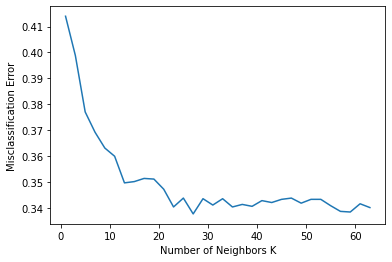

The optimal number of neighbors (calculated in the training set) is 27


In [ ]:
mean_error = [1 - x for x in cv_scores]

plt.plot(neighbors, mean_error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

optimal_k = neighbors[mean_error.index(min(mean_error))]
print("The optimal number of neighbors (calculated in the training set) is %d" % optimal_k)

In [ ]:
from sklearn import neighbors

selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = neighbors.KNeighborsClassifier(n_jobs=-1)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)], memory = 'tmp')

vthreshold = [0.01, 0.5, 1, 2, 3] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [9, 10, 11, 12, 13] # PCA
k = [5,27] # δοκίμασα και list(range(1,64)) και ετσι προέκυψε το 5 που δίνει λίγο καλύτερες αποδόσεις από το 27, πήρε περίπου 20 λεπτά

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Accuracy score:", accuracy_score(test_labels, preds))
print("F1-score:",f1_score(test_labels, preds))
print(classification_report(test_labels, preds))
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)

Accuracy score: 0.7308571428571429
F1-score: 0.7260034904013961
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       864
           1       0.75      0.70      0.73       886

    accuracy                           0.73      1750
   macro avg       0.73      0.73      0.73      1750
weighted avg       0.73      0.73      0.73      1750

Συνολικός χρόνος fit και predict: 41.81631779670715 seconds
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=1)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=11)),
                ('kNN', KNeighborsClassifier(n_jobs=-1))])
{'kNN__n_neighbors': 5, 'pca__n_components': 11, 'selector__threshold': 1}


|  Classifier | Accuracy| Accuracy optimized | F1 score|F1 score Optimized|Train & Test time
| :----:       |    :----:   |   :---: |:---: |:---: |:---: |
| *K Neighbors*|0.6291|0.7308|0.6180|0.726|41.81sec|




Χρόνοι train και test  για το καλύτερο μοντέλο:

In [ ]:
selector = VarianceThreshold(threshold=1)
scaler = StandardScaler()
pca = PCA(n_components=11)
clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=5)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)], memory = 'tmp')

start_time = time.time()
pipe.fit(train, train_labels)
train_time = time.time() - start_time 
print("Train time=", train_time)

start_time = time.time()
preds_knn = pipe.predict(test)
test_time = time.time() - start_time 
print("Test time=", test_time)

Train time= 0.07833075523376465
Test time= 0.17030668258666992


##4.4 Βελτιστοποίηση Logistic Regression

In [ ]:
#για να δούμε το warning στο απλό fit και πως να το αντιμετωπίσουμε
logisticRegr = LogisticRegression()
logisticRegr.fit(train, train_labels)
predictions = logisticRegr.predict(test)
print("Accuracy score =", accuracy_score(test_labels, predictions))
print("F1-score =",f1_score(test_labels, predictions))

Accuracy score = 0.7074285714285714
F1-score = 0.7016317016317016


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Πρωτού φτιάξω το grid search δοκίμασα αρκετά πράγματα καθώς παίρνει πολύ ώρα. Η PCA δεν βοηθάει να βελτιωθούν τα σκορ στην συγκεκριμένη περίπτωση.Ωστόσο,αν την χρησιμοποιήσουμε το train & fit γίνεται πολύ πιο γρήγορα.  

In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
clf = LogisticRegression(n_jobs=-1)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('LogRegr', clf)], memory = 'tmp')

vthreshold = [0.1, 0.5, 1]
solvers = ['sag', 'saga'] 
max_iters = [2000] 
penalties = ['l2','none'] 

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, LogRegr__solver=solvers, LogRegr__penalty=penalties, LogRegr__max_iter=max_iters), cv=10, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Accuracy score:", accuracy_score(test_labels, preds))
print("F1-score:",f1_score(test_labels, preds))
print(classification_report(test_labels, preds))
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)

Accuracy score: 0.732
F1-score: 0.7268491555037857
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       864
           1       0.75      0.70      0.73       886

    accuracy                           0.73      1750
   macro avg       0.73      0.73      0.73      1750
weighted avg       0.73      0.73      0.73      1750

Συνολικός χρόνος fit και predict: 1862.4193065166473 seconds
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.1)),
                ('scaler', StandardScaler()),
                ('LogRegr',
                 LogisticRegression(max_iter=2000, n_jobs=-1, solver='sag'))])
{'LogRegr__max_iter': 2000, 'LogRegr__penalty': 'l2', 'LogRegr__solver': 'sag', 'selector__threshold': 0.1}


|  Classifier | Accuracy| Accuracy optimized | F1 score|F1 score Optimized|Train & Test time
| :----:       |    :----:   |   :---: |:---: |:---: |:---: |
| *Logistic Regression*|0.7074|0.732|0.7016|0.7268|1862.42sec|

Χρόνοι train και test για το καλύτερο μοντέλο:

In [ ]:
selector = VarianceThreshold(threshold=0.1)
scaler = StandardScaler()
clf = LogisticRegression(n_jobs=-1, penalty = 'l2', solver = 'sag', max_iter=2000)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('LogRegr', clf)], memory = 'tmp')

start_time = time.time()
pipe.fit(train, train_labels)
train_time = time.time() - start_time 
print("Train time=", train_time)

start_time = time.time()
preds_log = pipe.predict(test)
test_time = time.time() - start_time 
print("Test time=", test_time)

Train time= 18.209552526474
Test time= 0.009740591049194336


##4.5 Βελτιστοποίηση MLP

In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('MLP', clf)], memory = 'tmp')

vthreshold = [0.5, 1] 
n_components = [10, 11, 12] 
activations = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']
hidden_layer_sizes=[(5,), (10,)]

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, MLP__hidden_layer_sizes = hidden_layer_sizes, MLP__solver = solvers, MLP__activation = activations), cv=10, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Accuracy score:", accuracy_score(test_labels, preds))
print("F1-score:",f1_score(test_labels, preds))
print(classification_report(test_labels, preds))
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)

Accuracy score: 0.7074285714285714
F1-score: 0.7054085155350978
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       864
           1       0.72      0.69      0.71       886

    accuracy                           0.71      1750
   macro avg       0.71      0.71      0.71      1750
weighted avg       0.71      0.71      0.71      1750

Συνολικός χρόνος fit και predict: 1209.992835521698 seconds
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.5)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('MLP',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=(10,),
                               solver='lbfgs'))])
{'MLP__activation': 'logistic', 'MLP__hidden_layer_sizes': (10,), 'MLP__solver': 'lbfgs', 'pca__n_components': 10, 'selector__threshold': 0.5}


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Χρόνοι train και test για το καλύτερο μοντέλο:

In [ ]:
#αύξησα των αριθμό των max_iters και επίσης δοκίμασα μερικά alphas και περισσότερα hidden layers 
#γενικά είχα χρησιμοποιήσει όλες αυτές τις παραμέτρους σε ένα grid search και επί 5 ώρες δεν έβγαλε κάποιο αποτέλεσμα

selector = VarianceThreshold(threshold=0.5)
scaler = StandardScaler()
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(10,),alpha = 0.001, max_iter= 5000 )
pca = PCA(n_components=10)

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('MLP', clf)], memory = 'tmp')

start_time = time.time()
pipe.fit(train, train_labels)
train_time = time.time() - start_time 
print("Train time=", train_time)

start_time = time.time()
preds = pipe.predict(test)
test_time = time.time() - start_time 
print("Test time=", test_time)

print("Accuracy score:", accuracy_score(test_labels, preds))
print("F1-score:",f1_score(test_labels, preds))
print(classification_report(test_labels, preds))


Train time= 7.310502767562866
Test time= 0.009448051452636719
Accuracy score: 0.7274285714285714
F1-score: 0.7253886010362693
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       864
           1       0.74      0.71      0.73       886

    accuracy                           0.73      1750
   macro avg       0.73      0.73      0.73      1750
weighted avg       0.73      0.73      0.73      1750



|  Classifier | Accuracy| Accuracy optimized | F1 score|F1 score Optimized|Train & Test time
| :----:       |    :----:   |   :---: |:---: |:---: |:---: |
| *MLP*|0.5668|0.7274|0.6747|0.7254|1209.99sec|

##4.6 Βελτιστοποίηση SVΜ



In [ ]:
selector = VarianceThreshold()
scaler = StandardScaler()
pca = PCA()
clf = SVC()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('SVC', clf)], memory = 'tmp')

vthreshold = [0.01, 0.5, 1, 2, 3] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [9, 10, 11, 12, 13] # PCA
kernels=['linear', 'poly', 'rbf', 'sigmoid'] #σημαντική υπερπαράμετρος SVC

estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, SVC__kernel = kernels), cv=10, scoring='accuracy', n_jobs=-1)
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Accuracy score:", accuracy_score(test_labels, preds))
print("F1-score:",f1_score(test_labels, preds))
print(classification_report(test_labels, preds))
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

print(estimator.best_estimator_)
print(estimator.best_params_)

Accuracy score: 0.7342857142857143
F1-score: 0.712430426716141
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       864
           1       0.79      0.65      0.71       886

    accuracy                           0.73      1750
   macro avg       0.74      0.74      0.73      1750
weighted avg       0.74      0.73      0.73      1750

Συνολικός χρόνος fit και predict: 915.0075371265411 seconds
Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=2)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('SVC', SVC())])
{'SVC__kernel': 'rbf', 'pca__n_components': 9, 'selector__threshold': 2}


|  Classifier | Accuracy| Accuracy optimized | F1 score|F1 score Optimized|Train & Test time
| :----:       |    :----:   |   :---: |:---: |:---: |:---: |
| *SVM*|0.7034|0.7342|0.6822|0.7124|915sec|

Χρόνοι train και test για το καλύτερο μοντέλο:

In [ ]:
selector = VarianceThreshold(threshold=2)
scaler = StandardScaler()
pca = PCA(n_components=9)
clf = SVC(kernel='rbf')
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('LogRegr', clf)], memory = 'tmp')

start_time = time.time()
pipe.fit(train, train_labels)
train_time = time.time() - start_time 
print("Train time=", train_time)

start_time = time.time()
preds = pipe.predict(test)
test_time = time.time() - start_time 
print("Test time=", test_time)

Train time= 1.9482252597808838
Test time= 0.9558365345001221


#5.Αποτελέσματα και Συμπεράσματα

Ο πίνακας markdown με τις μεταβολές και τους χρόνους φαίνεται παρακάτω:

|  Classifier | Default Accuracy|Accuracy Optimized| Accuracy increase | Default F1 Score|F1 score Optimized |F1 score increase|Time best train| Time best test|
| :----: |    :----:   |   :---: |:---: |:---: |:---: |:---: |:---: |:---: |
| *SVM*|0.7034|**0.7342**|+0.0308|0.6822|**0.7124**|+0.0302|1.948|0.956
| *Logistic Regression*|0.7074|**0.732**|+0.0246|0.7016|**0.7268**|+0.0252|18.209|0.009|
| *K Neighbors*|0.6291|**0.7308**|+0.1017|0.6180|**0.726**|+0.108|0.078|0.171|
| *MLP*|0.5668|**0.7274**|+0.1606|0.6747|**0.7254**|+0.0507|7.311|0.009
| *GaussianNB*|0.6846|**0.7028**|+0.0182|0.6373|**0.6786**|+0.0413|0.073|0.005|
| *Dummy*|0.4937|**0.5085**|+0.0148|0.0|**0.5097**|+0.5097|0.072|0.011|


Tο barplot με τις μεταβολές φαίνεται παρακάτω:

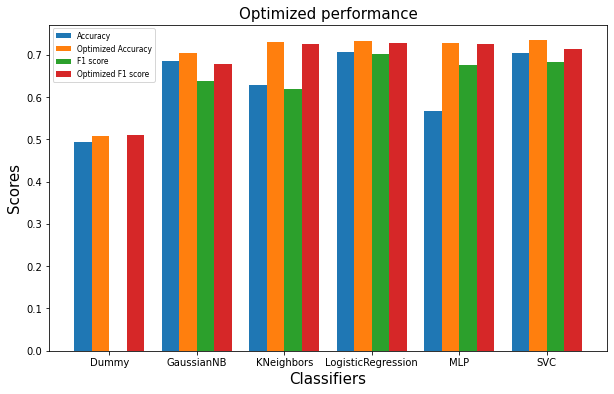

In [5]:
fig = plt.figure(figsize =(10, 6))

Accuracy = [0.4937, 0.6846, 0.6291, 0.7074, 0.5668, 0.7034 ]
Optimized_Accuracy = [0.5085, 0.7028, 0.7308, 0.732, 0.7274, 0.7342] 

F1_score = [0.0, 0.6373, 0.6180, 0.7016, 0.6747, 0.6822]
Optimized_F1_score = [0.5097, 0.6786, 0.726, 0.7268, 0.7254, 0.7124]

width =0.2
plt.title('Optimized performance', fontsize = 15)
plt.bar(np.arange(len(Accuracy)),Accuracy, width=width, label='Accuracy')
plt.bar(np.arange(len(Optimized_Accuracy))+ width, Optimized_Accuracy, width=width, label='Optimized Accuracy')
plt.bar(np.arange(len(F1_score))+ 2*width, F1_score, width=width, label='F1 score')
plt.bar(np.arange(len(Optimized_F1_score))+ 3*width, Optimized_F1_score, width=width, label='Optimized F1 score')

plt.xlabel('Classifiers', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.xticks([ r + 1.5*width for r in range(len(Accuracy))],['Dummy', 'GaussianNB', 'KNeighbors', 'LogisticRegression', 'MLP', 'SVC'])

plt.legend(prop={'size': 7.5})
plt.show()

Την μεγαλύτερη αύξηση στην επίδοση σχετικά με την out of the box παρουσίασαν οι ταξινομητές kNeighbors και MLP. Οι ταξινομητές kNN, SVM, Logistic Regression και MLP έφτασαν σε πολύ κοντινές αποδόσεις accuracy της τάξης 72.5% - 73.5%, ενώ λίγο πιο πίσω είναι ο Gaussian NB με αccuracy 70.28%, χωρίς να λαμβάνουμε υπόψιν τον dummy. Παρόμοια κινούνται και τα F1 scores. 

Και οι 4 πρώτοι ταξινομητές θα μπορούσαν να χρησιμοποιηθούν για το πρόβλημα εφόσον έχουν πολύ κοντινές αποδόσεις. Παρακάτω εκτυπώνω τα confusion matrices του kNN (ένας από τους καλύτερους) και του GaussianNB (Ο χειρότερος με μικρή διαφορά). Όπως θα δούμε αυτή η διαφορά είναι όντως μικρή με τον GaussianNB να έχει υψηλότερο ποσοστό στα false negatives.

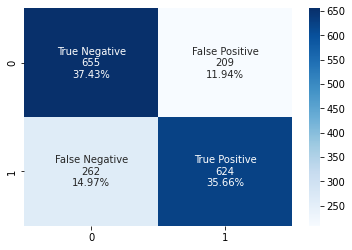

In [ ]:
#kNN Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, preds_knn)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

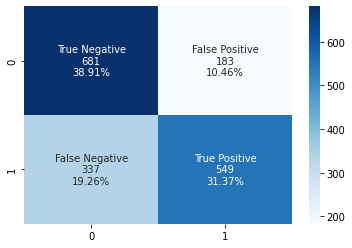

In [ ]:
#GaussianNB Confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_labels, preds_nb)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')